In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

crime_df = pd.read_csv('../data/crime_district.csv')
income_df = pd.read_csv('../data/hh_income_state.csv')
poverty_df = pd.read_csv('../data/hh_poverty_state.csv')
labor_df = pd.read_csv('../data/lfs_state_sex.csv')
crime_df["date"] = pd.to_datetime(crime_df["date"])
crime_df["year"] = crime_df["date"].dt.year

In [3]:
print("Data Overview:")
print(crime_df.head())

Data Overview:
      state district category type       date  crimes  year
0  Malaysia      All  assault  all 2016-01-01   22327  2016
1  Malaysia      All  assault  all 2017-01-01   21366  2017
2  Malaysia      All  assault  all 2018-01-01   16902  2018
3  Malaysia      All  assault  all 2019-01-01   16489  2019
4  Malaysia      All  assault  all 2020-01-01   13279  2020


In [4]:
print("\nData Information:")
print(crime_df.info())


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19152 entries, 0 to 19151
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   state     19152 non-null  object        
 1   district  19152 non-null  object        
 2   category  19152 non-null  object        
 3   type      19152 non-null  object        
 4   date      19152 non-null  datetime64[ns]
 5   crimes    19152 non-null  int64         
 6   year      19152 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(4)
memory usage: 972.7+ KB
None


In [5]:
print("\nSummary Statistics:")
print(crime_df.describe())


Summary Statistics:
                      date        crimes          year
count                19152  19152.000000  19152.000000
mean   2019-07-02 18:00:00    189.728018   2019.500000
min    2016-01-01 00:00:00      0.000000   2016.000000
25%    2017-10-01 18:00:00      1.000000   2017.750000
50%    2019-07-02 12:00:00     12.000000   2019.500000
75%    2021-04-02 06:00:00     66.000000   2021.250000
max    2023-01-01 00:00:00  90028.000000   2023.000000
std                    NaN   1590.813293      2.291348


In [7]:
print("Unique states:", crime_df['state'].unique())
print("Unique categories:", crime_df['category'].unique())
print("Unique years:", crime_df['year'].unique())
print("Unique types:", crime_df['type'].unique())

# Calculate total crimes by year
yearly_crimes = crime_df.groupby('year')['crimes'].sum()

Unique states: ['Malaysia' 'Johor' 'Kedah' 'Kelantan' 'Melaka' 'Negeri Sembilan' 'Pahang'
 'Perak' 'Perlis' 'Pulau Pinang' 'Sabah' 'Sarawak' 'Selangor' 'Terengganu'
 'W.P. Kuala Lumpur']
Unique categories: ['assault' 'property']
Unique years: [2016 2017 2018 2019 2020 2021 2022 2023]
Unique types: ['all' 'causing_injury' 'murder' 'rape' 'robbery_gang_armed'
 'robbery_gang_unarmed' 'robbery_solo_armed' 'robbery_solo_unarmed'
 'break_in' 'theft_other' 'theft_vehicle_lorry' 'theft_vehicle_motorcar'
 'theft_vehicle_motorcycle']


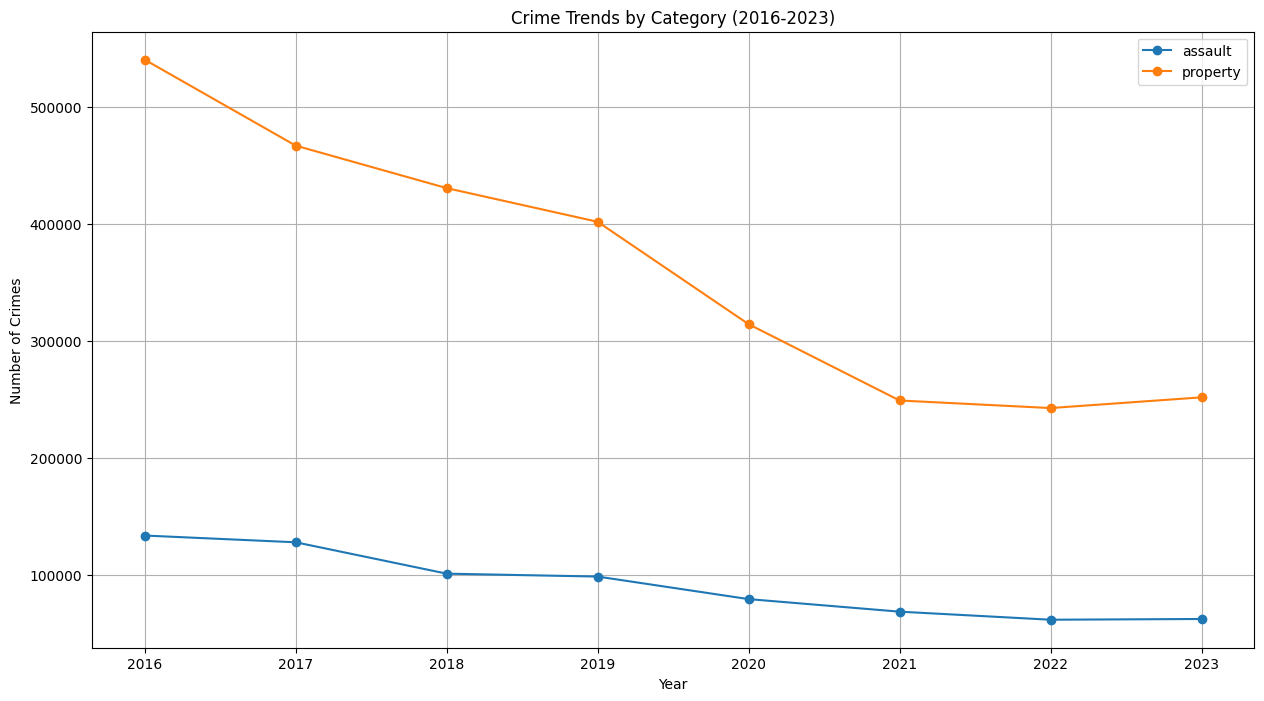

In [9]:
# Group crimes by year and category
crime_yearly = crime_df.groupby(['year', 'category'])['crimes'].sum().reset_index()

# Plot crime trends
plt.figure(figsize=(15, 8))
for category in crime_yearly['category'].unique():
    data = crime_yearly[crime_yearly['category'] == category]
    plt.plot(data['year'], data['crimes'], marker='o', label=category)
    
plt.title('Crime Trends by Category (2016-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.legend()
plt.grid(True)
plt.savefig('../results/crime/crime_trends.png')
plt.show()
plt.close()
    
# Calculate year-over-year change
yearly_total = crime_df.groupby('year')['crimes'].sum()
yoy_change = yearly_total.pct_change() * 100

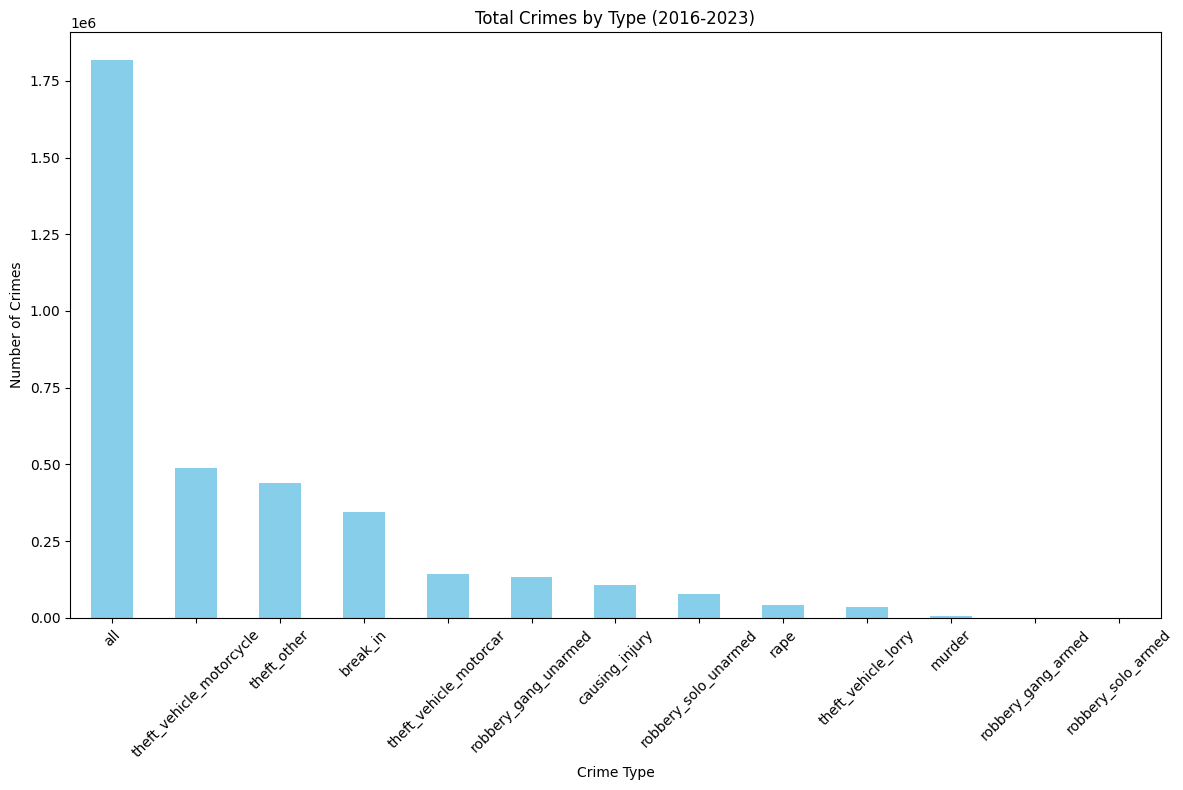

In [12]:
crime_types = crime_df.groupby('type')['crimes'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
crime_types.plot(kind='bar', color='skyblue')
plt.title('Total Crimes by Type (2016-2023)')
plt.xlabel('Crime Type')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../results/crime/crime_types.png')
plt.show()
plt.close()


In [13]:
crime_types

type
all                         1817180
theft_vehicle_motorcycle     487977
theft_other                  439980
break_in                     344202
theft_vehicle_motorcar       141843
robbery_gang_unarmed         133080
causing_injury               106824
robbery_solo_unarmed          78267
rape                          41604
theft_vehicle_lorry           34512
murder                         7386
robbery_gang_armed              615
robbery_solo_armed              201
Name: crimes, dtype: int64

<Figure size 1200x600 with 0 Axes>

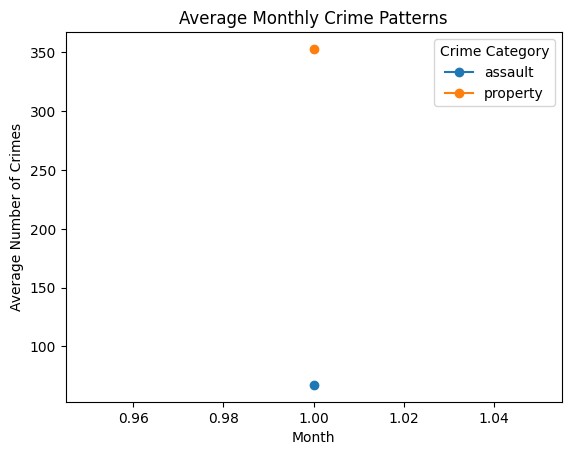

In [14]:
crime_df['date'] = pd.to_datetime(crime_df['date'])
crime_df['month'] = crime_df['date'].dt.month
monthly_crimes = crime_df.groupby(['month', 'category'])['crimes'].mean().unstack()
plt.figure(figsize=(12, 6))
monthly_crimes.plot(marker='o')
plt.title('Average Monthly Crime Patterns')
plt.xlabel('Month')
plt.ylabel('Average Number of Crimes')
plt.legend(title='Crime Category')
plt.show()

In [16]:

# 3. Crime Rate per Category Over Time
crime_df['year'] = crime_df['date'].dt.year
crime_trends = crime_df.pivot_table(
    index='year', 
    columns='type',
    values='crimes',
    aggfunc='sum'
).fillna(0)

In [17]:
# Calculate percentage change
crime_pct_change = crime_trends.pct_change() * 100
print("\nYear-over-year percentage change in crime types:")
print(crime_pct_change)


Year-over-year percentage change in crime types:
type        all   break_in  causing_injury     murder       rape  \
year                                                               
2016        NaN        NaN             NaN        NaN        NaN   
2017 -11.735125 -13.640725       -9.166516 -16.885965  -2.704136   
2018 -10.595946  -2.833158       -7.245223 -14.775726 -10.190736   
2019  -5.871738   4.796087        1.115880  -4.024768   5.461165   
2020 -21.240334 -14.893617      -12.606112 -18.387097  -8.975834   
2021 -19.219125 -19.145299       -1.335600  -3.952569  -1.833123   
2022  -4.301561  -6.756519       -6.300763  -1.234568  10.238249   
2023   3.209809   9.182806       -2.994484   7.500000  11.799065   

type  robbery_gang_armed  robbery_gang_unarmed  robbery_solo_armed  \
year                                                                 
2016                 NaN                   NaN                 NaN   
2017          -52.307692            -10.341982          -84

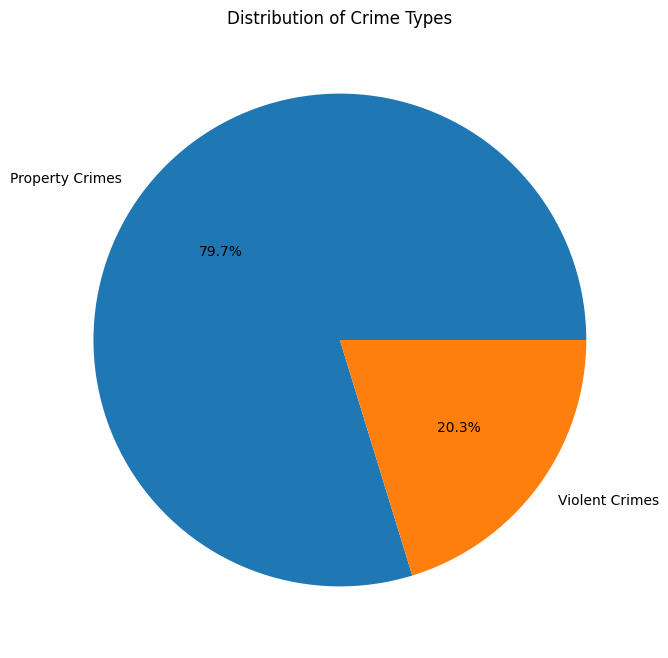

In [18]:
# 4. Property vs Violent Crime Comparison
property_crimes = crime_df[crime_df['category'] == 'property']['crimes'].sum()
violent_crimes = crime_df[crime_df['category'] == 'assault']['crimes'].sum()
crime_composition = pd.Series({
    'Property Crimes': property_crimes,
    'Violent Crimes': violent_crimes
})
plt.figure(figsize=(8, 8))
plt.pie(crime_composition, labels=crime_composition.index, autopct='%1.1f%%')
plt.title('Distribution of Crime Types')
plt.show()

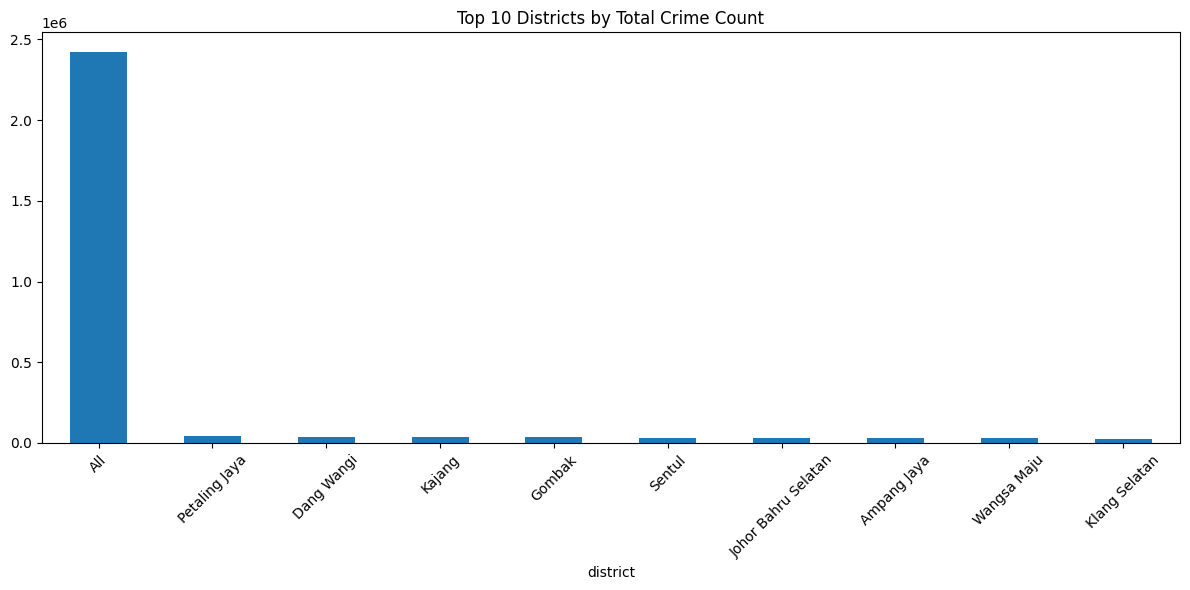

In [23]:
# 6. Top Crime Locations Analysis
location_crimes = crime_df.groupby('district')['crimes'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
location_crimes.head(10).plot(kind='bar')
plt.title('Top 10 Districts by Total Crime Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
# 7. Calculate Crime Rate Changes During COVID-19 Period (2019 vs 2020)
covid_impact = crime_df[crime_df['year'].isin([2019, 2020])].groupby(['year', 'type'])['crimes'].sum().unstack()
covid_change = ((covid_impact.loc[2020] - covid_impact.loc[2019]) / covid_impact.loc[2019] * 100).round(2)
print("\nPercentage change in crime types during COVID-19 (2019-2020):")
print(covid_change)


Percentage change in crime types during COVID-19 (2019-2020):
type
all                        -21.24
break_in                   -14.89
causing_injury             -12.61
murder                     -18.39
rape                        -8.98
robbery_gang_armed         -71.43
robbery_gang_unarmed       -50.61
robbery_solo_armed         -44.44
robbery_solo_unarmed        18.73
theft_other                -14.68
theft_vehicle_lorry        -40.54
theft_vehicle_motorcar     -32.54
theft_vehicle_motorcycle   -28.63
dtype: float64


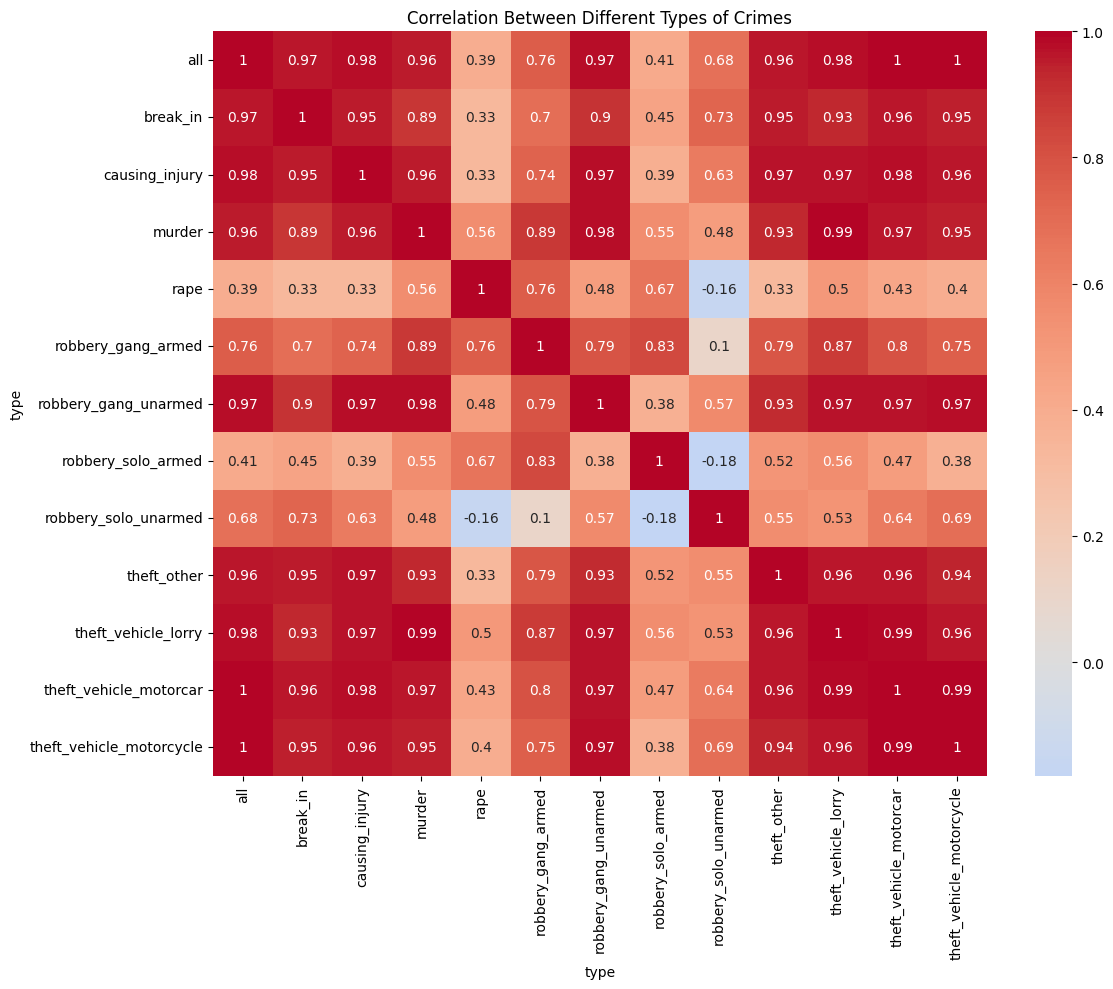

In [25]:
# 8. Correlation Matrix of All Crime Types
crime_pivot = crime_df.pivot_table(
    index='date',
    columns='type',
    values='crimes',
    aggfunc='sum'
).fillna(0)

plt.figure(figsize=(12, 10))
sns.heatmap(crime_pivot.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Different Types of Crimes')
plt.tight_layout()
plt.show()

More details 
(remove Malaysia and district All)

In [48]:
filtered_crime_df = crime_df[(crime_df['state'] != 'Malaysia') & (crime_df['district'] != 'All') & (crime_df['type'] != 'all')]

# Create correlation matrix for specific districts
crime_pivot = filtered_crime_df.pivot_table(
    index='date',
    columns='type',
    values='crimes',
    aggfunc='sum'
).fillna(0)

In [49]:
filtered_crime_df

,state,district,category,type,date,crimes,year
232,Johor,Batu Pahat,assault,causing_injury,2016-01-01,39,2016
233,Johor,Batu Pahat,assault,causing_injury,2017-01-01,41,2017
234,Johor,Batu Pahat,assault,causing_injury,2018-01-01,28,2018
235,Johor,Batu Pahat,assault,causing_injury,2019-01-01,41,2019
236,Johor,Batu Pahat,assault,causing_injury,2020-01-01,43,2020
...,...,...,...,...,...,...,...
19147,W.P. Kuala Lumpur,Wangsa Maju,property,theft_vehicle_motorcycle,2019-01-01,755,2019
19148,W.P. Kuala Lumpur,Wangsa Maju,property,theft_vehicle_motorcycle,2020-01-01,646,2020
19149,W.P. Kuala Lumpur,Wangsa Maju,property,theft_vehicle_motorcycle,2021-01-01,403,2021
19150,W.P. Kuala Lumpur,Wangsa Maju,property,theft_vehicle_motorcycle,2022-01-01,369,2022


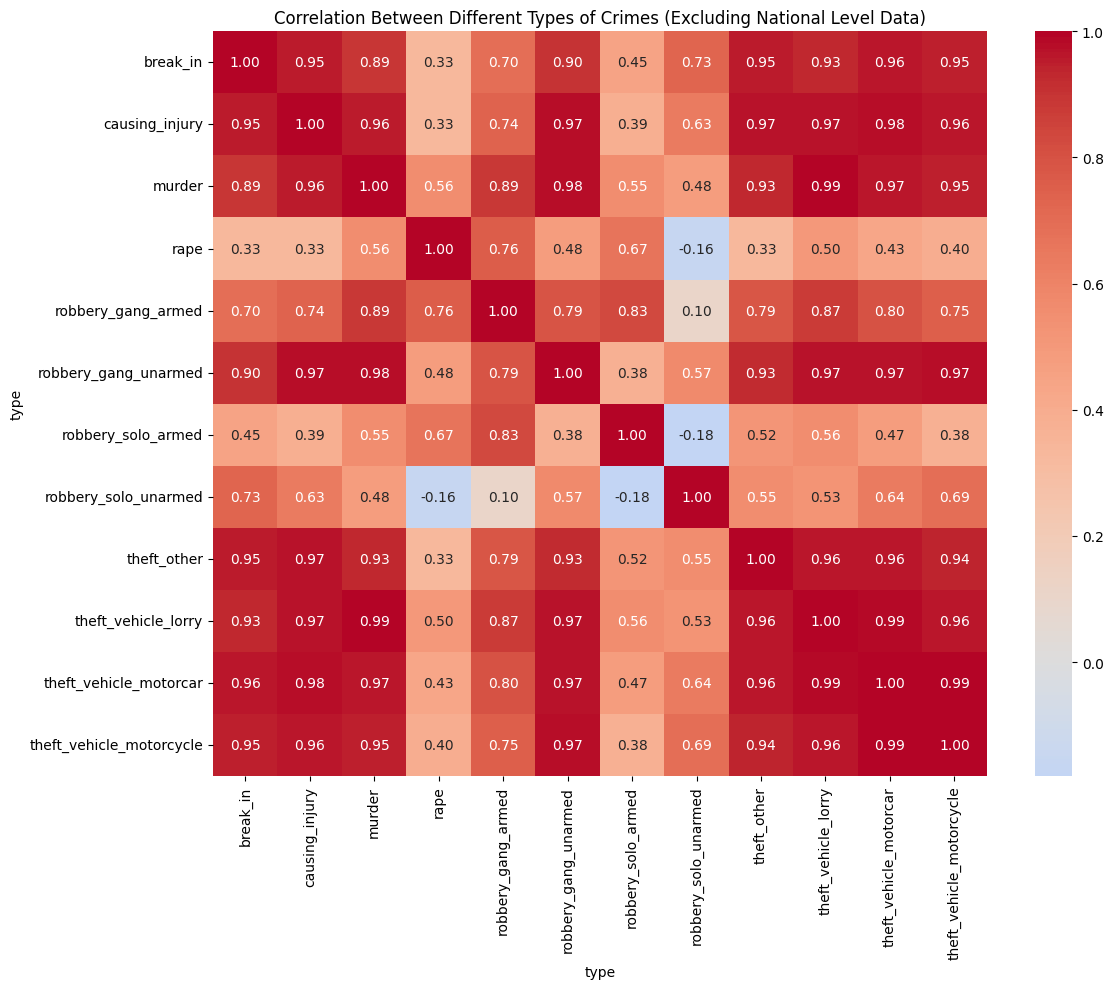

In [50]:
# Create correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(crime_pivot.corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Between Different Types of Crimes (Excluding National Level Data)')
plt.tight_layout()
plt.show()

In [51]:
# Let's also see the top 10 districts by total crime count
district_crime_summary = filtered_crime_df.groupby(['state', 'district'])['crimes'].sum().sort_values(ascending=False)
print("\nTop 10 Districts by Total Crime Count:")
print(district_crime_summary.head(10))


Top 10 Districts by Total Crime Count:
state              district           
Selangor           Petaling Jaya          23078
W.P. Kuala Lumpur  Dang Wangi             19980
Selangor           Kajang                 19250
                   Gombak                 19058
W.P. Kuala Lumpur  Sentul                 16456
Johor              Johor Bahru Selatan    16022
Selangor           Ampang Jaya            15693
W.P. Kuala Lumpur  Wangsa Maju            14965
Selangor           Klang Selatan          13850
Melaka             Melaka Tengah          13765
Name: crimes, dtype: int64


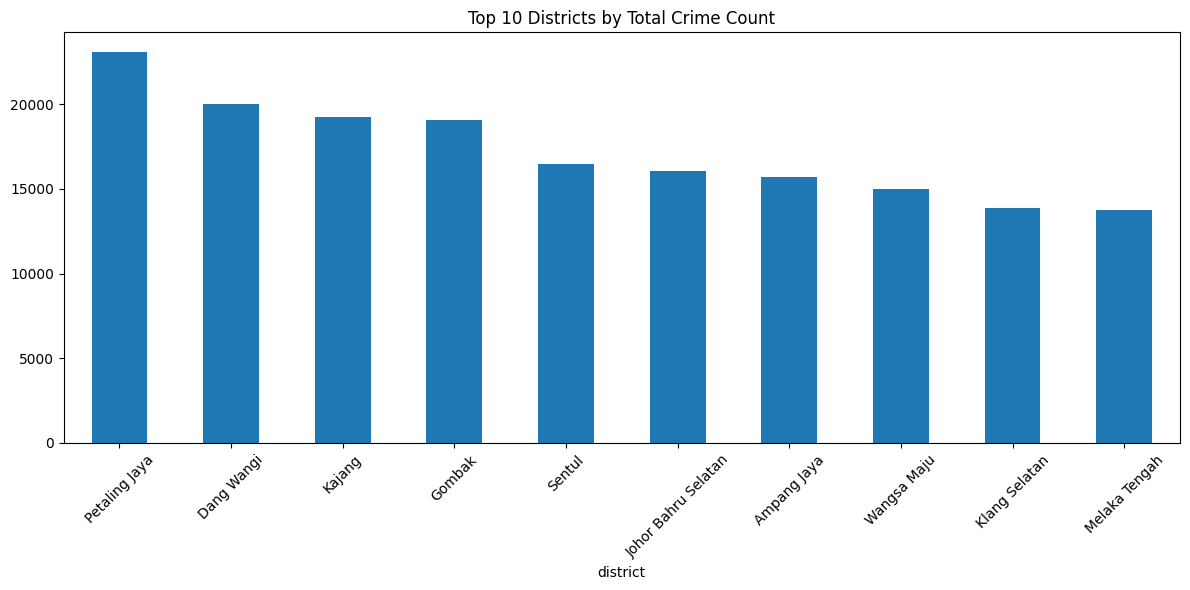

In [52]:
# 6. Top Crime Locations Analysis
location_crimes = filtered_crime_df.groupby('district')['crimes'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
location_crimes.head(10).plot(kind='bar')
plt.title('Top 10 Districts by Total Crime Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

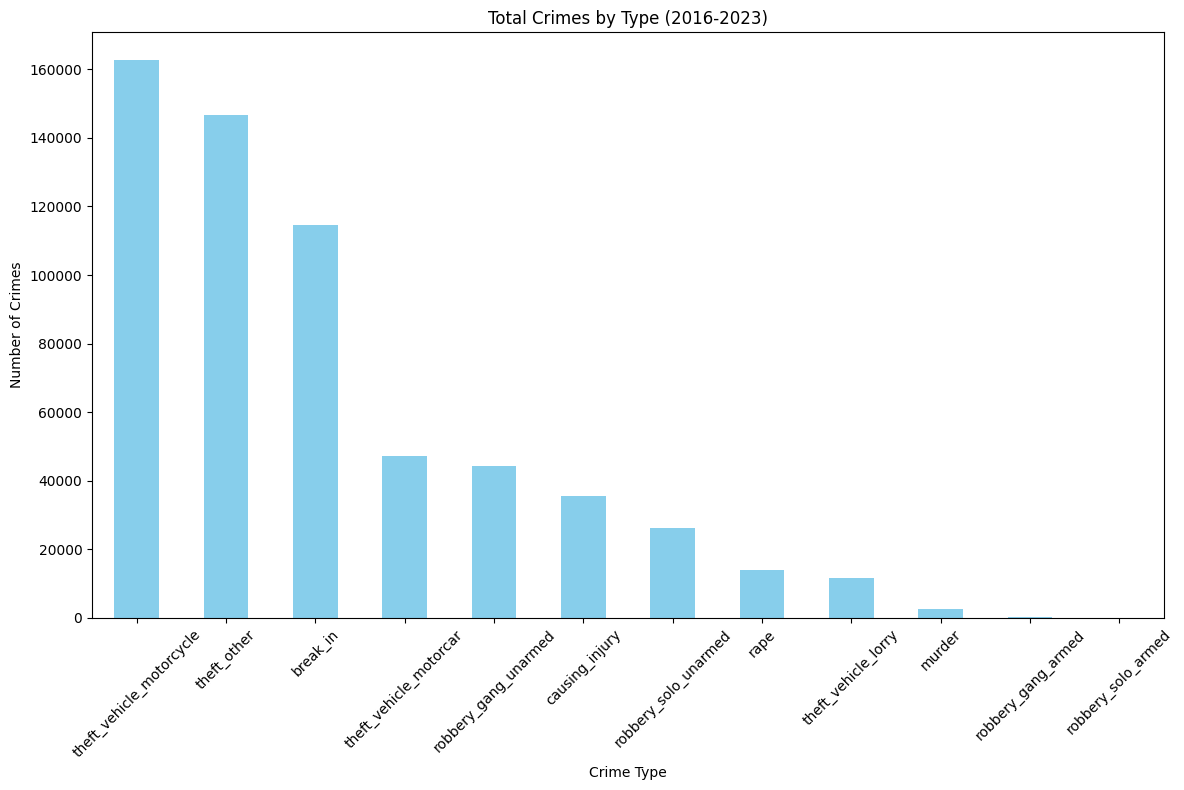

In [53]:
crime_types = filtered_crime_df.groupby('type')['crimes'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
crime_types.plot(kind='bar', color='skyblue')
plt.title('Total Crimes by Type (2016-2023)')
plt.xlabel('Crime Type')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../results/crime/crime_types.png')
plt.show()
plt.close()
